In [1]:
import sys
sys.path.append('./paralel_planarity_criterion')
import random
import numpy as np

import SPQR
import printers
import triconnected_components as tcc 
finder = tcc.TriconnectedFinder()

In [2]:
# 🎲 Generate a random seed  ### interesting seeds: 3244861328
seed = random.randint(0, 2**32 - 1)
print("Using seed:", seed)

# 🌱 Seed NumPy’s RNG
np.random.seed(seed)

Using seed: 2747146954


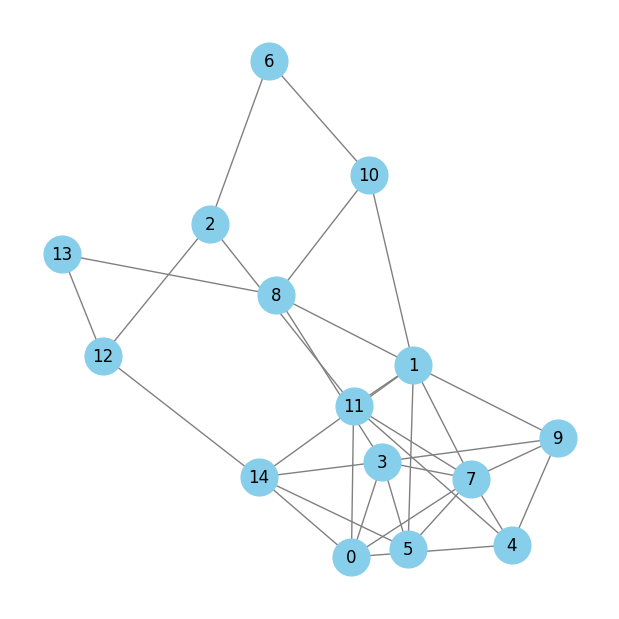

In [3]:
### CREATE A RANDOM GRAPH G ###

import networkx as nx
import matplotlib.pyplot as plt

# Parameters
n = 15 # Number of nodes
p = 0.3 # Probability of edge creation

G = nx.erdos_renyi_graph(n, p)
while not nx.is_connected(G):
    G = nx.erdos_renyi_graph(n, p)

# Draw the graph
plt.figure(figsize=(6, 6))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=700, edge_color='gray')
plt.show()

Image saved to: images\SPQR_tree.png


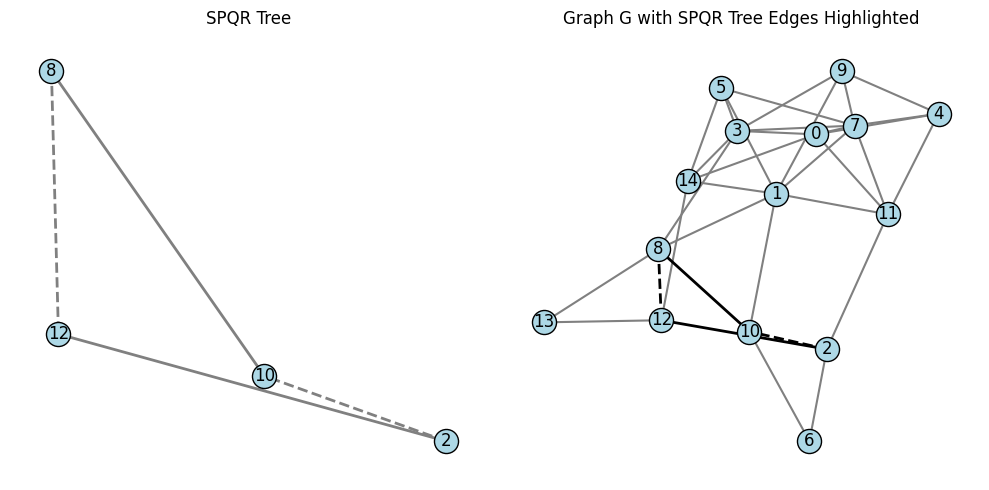

In [4]:
TCCs, info = finder.triconnected_comps(G)
edges_dict, SPQR_tree = SPQR.get_SPQR_tree(G, TCCs)
printers.SPQR_drawer.plot_SPQR_visuals(G, edges_dict, SPQR_tree, save=True)

In [5]:
print(TCCs)
print(edges_dict)

[{'node_list': frozenset({2, 10, 6}), 'virtual_edges': [(2, 10)]}, {'node_list': frozenset({8, 12, 13}), 'virtual_edges': [(8, 12)]}, {'node_list': frozenset({0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 14}), 'virtual_edges': [(2, 10), (8, 12)]}]
{'real_edges': [(2, 12), (8, 10)], 'virtual_edges': [(2, 10), (8, 12)], 'uncategorized_edges': [], 'uncategorized_nodes': []}


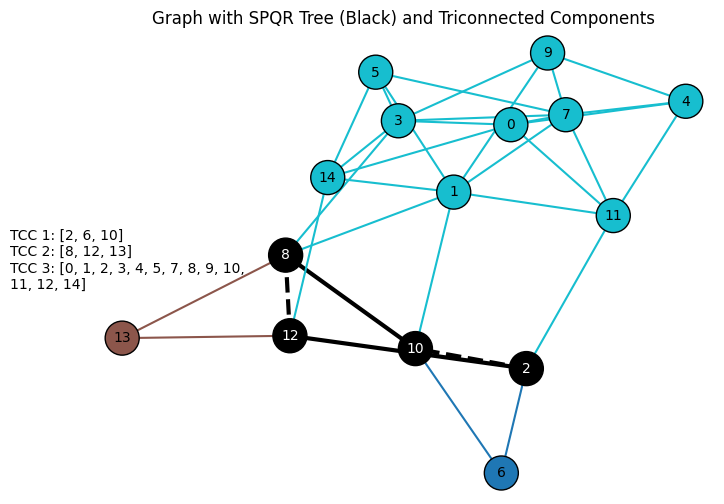

In [6]:
# TODO PENSAR COMO TRATAR LOS TCCs DE TRES NODOS, QUE SON REALMENTE GRAFOS CADENA.
printers.SPQR_drawer.plot_SPQR_and_TCC(G, TCCs, edges_dict, SPQR_tree, save=True) ### TODO CHECKEAR A VECES QUE NO SALEN TODOS LOS VIRTUAL EN EL SPQR TREE CREO QUE ES PORQUE SOLO SE TIENE EN CUENTA LA PRIMERA COMPONENTE TRICONECTADA